uplouding data and analysis

 --- data info --- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
 --- data head --- 
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
 --- data m

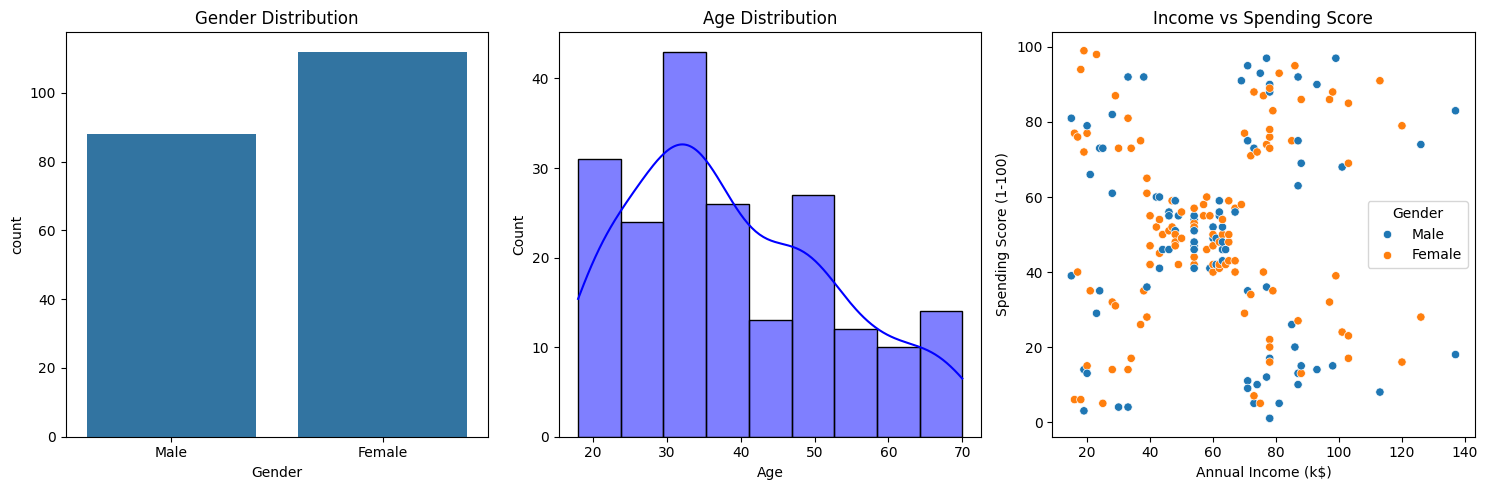

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# uploud data
df=pd.read_csv('/content/drive/MyDrive/machine learning/Mall_Customers.csv')

# analysis
print (" --- data info --- ")
print (df.info())
print (" --- data head --- ")
print (df.head())
print (" --- data mising value --- ")
print (df.isnull().sum())

#visualize
plt.figure(figsize=(15,5))

#gender Distribution
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

# Age Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')

# Income vs Spending Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender')
plt.title('Income vs Spending Score')

plt.tight_layout()
plt.show()

Creating the Model (The Elbow Method)

The Elbow Method Logic:

As we increase $K$, the WCSS (error) decreases. We look for the point where the rate of decrease shifts significantly—resembling an elbow. This is the optimal $K$.

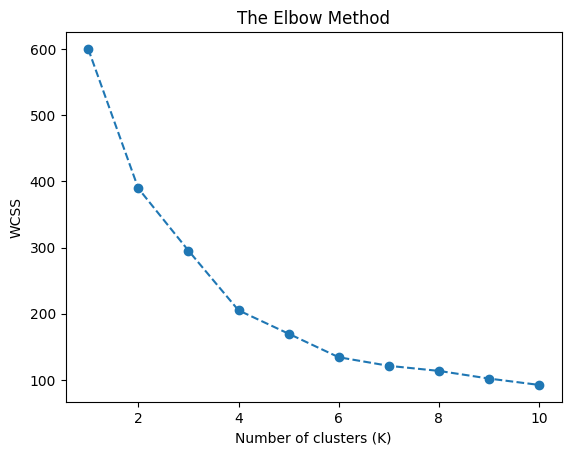

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# 1. Encoding Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# 2. Selecting Features for Clustering (Age, Income, Spending Score)
X = df.iloc[:, [2, 3, 4]].values

# 3. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Finding Optimal K using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

Building the Model and 3D Visualization Code with scaled data

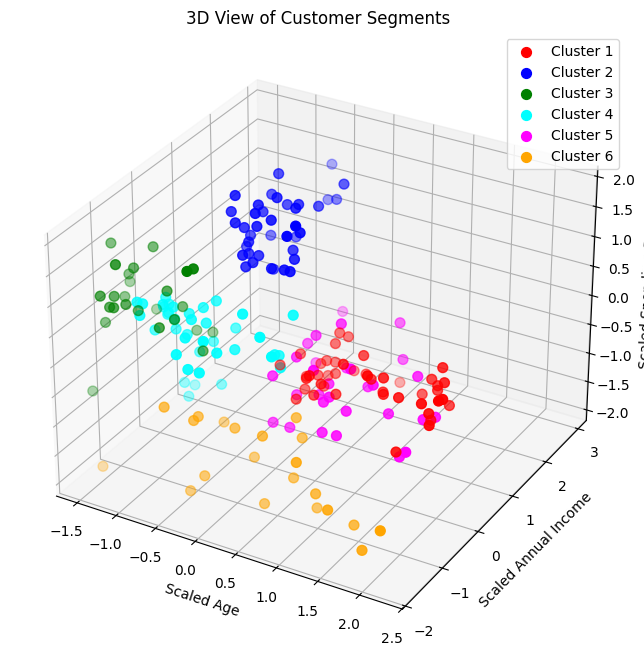

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# 1. Initialize and Fit the Final Model
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled) # This predicts the cluster for each row

# 2. Add the Cluster labels back to our original dataframe
df['Cluster'] = y_kmeans

# 3. Create a 3D Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'orange', 'black']
for i in range(6): # Change to 7 if you choose K=7
    ax.scatter(X_scaled[y_kmeans == i, 0],
               X_scaled[y_kmeans == i, 1],
               X_scaled[y_kmeans == i, 2],
               s=50, c=colors[i], label=f'Cluster {i+1}')

ax.set_xlabel('Scaled Age')
ax.set_ylabel('Scaled Annual Income')
ax.set_zlabel('Scaled Spending Score')
ax.set_title('3D View of Customer Segments')
plt.legend()
plt.show()

Building the Model and 3D Visualization Code with unscaled data

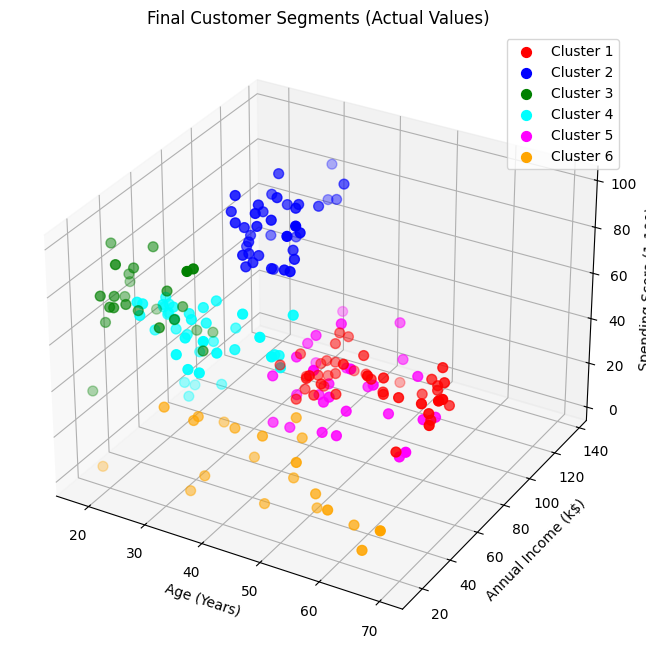

In [5]:
# Create a 3D Visualization using raw values
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# We use the original dataframe 'df' for the coordinates
# but we still use 'y_kmeans' for the colors
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'orange', 'black']

for i in range(6):
    ax.scatter(df.loc[df['Cluster'] == i, 'Age'],
               df.loc[df['Cluster'] == i, 'Annual Income (k$)'],
               df.loc[df['Cluster'] == i, 'Spending Score (1-100)'],
               s=50, c=colors[i], label=f'Cluster {i+1}')

# Now the labels reflect real-world units
ax.set_xlabel('Age (Years)')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Final Customer Segments (Actual Values)')

plt.legend()
plt.show()

Evaluation: Silhouette Score

In [7]:
from sklearn.metrics import silhouette_score

# Calculate the mean Silhouette Score for all samples
score = silhouette_score(X_scaled, y_kmeans)
print(f'Average Silhouette Score for K=6: {score:.3f}')

Average Silhouette Score for K=6: 0.431


The Silhouette Loop Code to find the best k

For K = 2, Silhouette Score is 0.3355
For K = 3, Silhouette Score is 0.3579
For K = 4, Silhouette Score is 0.4040
For K = 5, Silhouette Score is 0.4085
For K = 6, Silhouette Score is 0.4311
For K = 7, Silhouette Score is 0.4101
For K = 8, Silhouette Score is 0.3674
For K = 9, Silhouette Score is 0.3744
For K = 10, Silhouette Score is 0.3619

--- Result: Best K is 6 with a score of 0.4311 ---


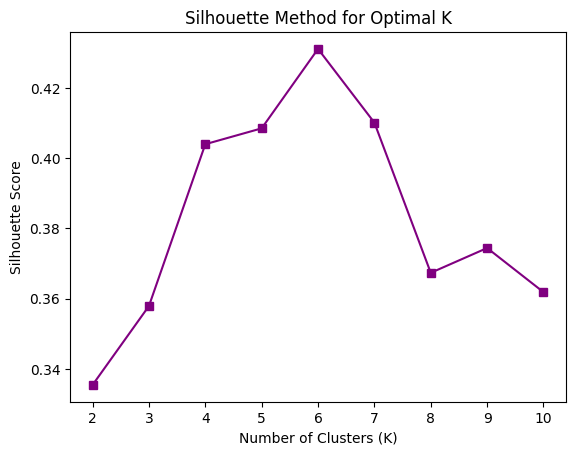

In [8]:
from sklearn.metrics import silhouette_score

# Range of clusters to try
k_range = range(2, 11)
scores = []

for k in k_range:
    model = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = model.fit_predict(X_scaled)

    # Calculate silhouette score for this K
    avg_score = silhouette_score(X_scaled, labels)
    scores.append(avg_score)
    print(f'For K = {k}, Silhouette Score is {avg_score:.4f}')

# Find the K with the maximum score
best_k = k_range[scores.index(max(scores))]
print(f'\n--- Result: Best K is {best_k} with a score of {max(scores):.4f} ---')

# Plot the results
plt.plot(k_range, scores, marker='s', color='purple')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.show()

In [9]:
import joblib

# Final fit
final_kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
final_kmeans.fit(X_scaled)

# Save
joblib.dump(final_kmeans, 'mall_customer_model_v1.pkl')
joblib.dump(scaler, 'mall_scaler_v1.pkl')

print("Final Optimized Model and Scaler have been saved!")

Final Optimized Model and Scaler have been saved!


Handling Outliers (The "Cleaning" Fix)

In [10]:
# Calculate IQR for Annual Income
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data (Remove outliers)
df_clean = df[(df['Annual Income (k$)'] >= lower_bound) & (df['Annual Income (k$)'] <= upper_bound)]

print(f"Original Data Size: {len(df)}")
print(f"Cleaned Data Size: {len(df_clean)}")

# Now Re-scale and Re-calculate Score
X_clean = df_clean.iloc[:, [2, 3, 4]].values
X_clean_scaled = scaler.fit_transform(X_clean)

model_clean = KMeans(n_clusters=6, init='k-means++', random_state=42)
labels_clean = model_clean.fit_predict(X_clean_scaled)

print(f"New Silhouette Score (After Outlier Removal): {silhouette_score(X_clean_scaled, labels_clean):.4f}")

Original Data Size: 200
Cleaned Data Size: 198
New Silhouette Score (After Outlier Removal): 0.4373


In [12]:
import joblib

# Ensure you are using the cleaned data (198 rows)
# Features: Age, Annual Income, Spending Score
X_v1 = df_clean.iloc[:, [2, 3, 4]].values
scaler_v1 = StandardScaler()
X_v1_scaled = scaler_v1.fit_transform(X_v1)

model_v1 = KMeans(n_clusters=6, init='k-means++', random_state=42)
model_v1.fit(X_v1_scaled)

# Save the 3D assets
joblib.dump(model_v1, 'mall_model_3d_v1.pkl')
joblib.dump(scaler_v1, 'mall_scaler_3d_v1.pkl')
print("V1 (3D Model - Score 0.437) saved successfully.")

V1 (3D Model - Score 0.437) saved successfully.


2D Clustering (The "Simplification" Fix)

Silhouette Score (2D - Income & Spend Only): 0.5547


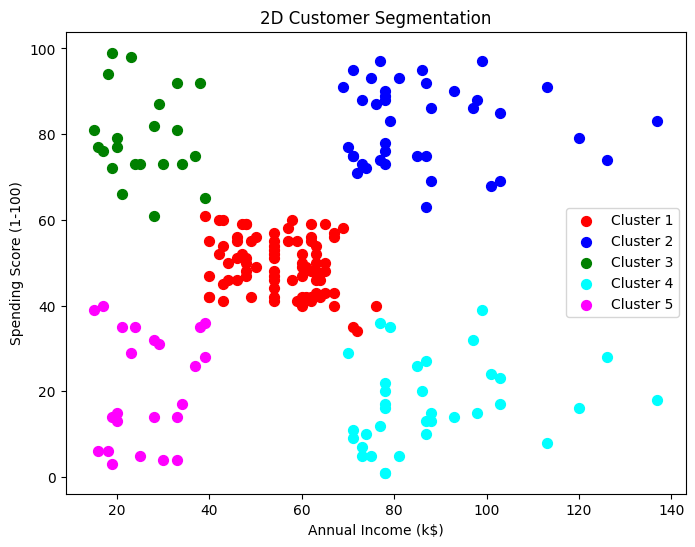

In [11]:
# 1. Select only Income and Spending Score (Columns 3 and 4)
X_2D = df.iloc[:, [3, 4]].values

# 2. Scale this 2D data
X_2D_scaled = scaler.fit_transform(X_2D)

# 3. Find the best K for 2D (Usually 5 for this dataset)
model_2D = KMeans(n_clusters=5, init='k-means++', random_state=42)
labels_2D = model_2D.fit_predict(X_2D_scaled)

# 4. Check the Score
score_2D = silhouette_score(X_2D_scaled, labels_2D)
print(f"Silhouette Score (2D - Income & Spend Only): {score_2D:.4f}")

# 5. Visualize 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_2D[labels_2D == 0, 0], X_2D[labels_2D == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_2D[labels_2D == 1, 0], X_2D[labels_2D == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X_2D[labels_2D == 2, 0], X_2D[labels_2D == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X_2D[labels_2D == 3, 0], X_2D[labels_2D == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X_2D[labels_2D == 4, 0], X_2D[labels_2D == 4, 1], s=50, c='magenta', label='Cluster 5')
plt.title('2D Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [13]:
# Features: Annual Income, Spending Score
X_v2 = df_clean.iloc[:, [3, 4]].values
scaler_v2 = StandardScaler()
X_v2_scaled = scaler_v2.fit_transform(X_v2)

# Using K=5 as it usually performs best for 2D
model_v2 = KMeans(n_clusters=5, init='k-means++', random_state=42)
model_v2.fit(X_v2_scaled)

# Save the 2D assets
joblib.dump(model_v2, 'mall_model_2d_v2.pkl')
joblib.dump(scaler_v2, 'mall_scaler_2d_v2.pkl')
print("V2 (2D Model - Score 0.554) saved successfully.")

V2 (2D Model - Score 0.554) saved successfully.
